<a href="https://colab.research.google.com/github/Valtern/machinelearningsmt5/blob/main/Midterm_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
import google.colab.drive
google.colab.drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [138]:
!pip install annoy

In [139]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.impute import SimpleImputer
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import silhouette_score, davies_bouldin_score
from annoy import AnnoyIndex

# Case Study 2 - CC General

- This case study relates to credit card user data.
- For students with attendance numbers 2, 5, 8, 11, etc.
- Follow these steps and analyze the results.

## Data Preprocessing (20 points)

1. Load data (5 points)
2. Perform data imputation on missing data. Attach your analysis explaining why you used the chosen imputation method. (10 points)
3. Drop irrelevant features (5 points)

## Clustering - 1 (30 points)

1. Create a cluster model using KMeans with the number of clusters from 1 to 10. (10 points)
2. Create an elbow diagram, determine the best number of clusters according to the elbow method, and provide your reasoning. (10 points)
3. Calculate the silhouette coefficient value for k=1 to k=10. Based on the silhouette value, what is the best number of clusters? Is it the same as the elbow method? (10 points)

NB: You are allowed to perform normalization/standardization before building the clustering model. Observe the clustering results.

## Clustering - 2 (20 points)

1. Create a cluster model using DBSCAN. How many clusters are produced? (10 points)
2. What are the silhouette coefficient and DBI values of the clusters produced by DBSCAN? (10 points)

## Feature Selection (30 points)
After knowing the performance of the clustering results on the KMeans and DBSCAN models based on the silhouette coefficient and DBI, perform a feature selection process to improve the silhouette coefficient and DBI values. You are allowed to use an iterative process or other methods.

1. Which features provide the best silhouette coefficient/DBI values? Include the feature selection process.
2. Why did you use that feature selection method?

## BONUS - CHALLENGE (30 points)
Build an ANNOY model using the data that has gone through the data preprocessing stage. Perform a query with the 5 nearest values. Does ANNOY query the best cluster you have formed?

# **Data Preprocessing**

In [140]:
# 1. Load data (5 points)
df = pd.read_csv('/content/drive/MyDrive/MLearning/2_CC_GENERAL.csv')
print("Data loaded successfully")
print(df.head())

Data loaded successfully
  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1          

In [141]:
# 2. Perform data imputation on missing data (10 points)
print("--- 2. Data Imputation ---")
print("Missing values before imputation:")
print(df.isnull().sum())

imputer = SimpleImputer(strategy='median')
df['MINIMUM_PAYMENTS'] = imputer.fit_transform(df[['MINIMUM_PAYMENTS']])
df['CREDIT_LIMIT'] = imputer.fit_transform(df[['CREDIT_LIMIT']])

print("\nMissing values after imputing with median:")
print(df.isnull().sum())

--- 2. Data Imputation ---
Missing values before imputation:
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Missing values after imputing with median:
CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PUR

**Attach your analysis explaining why you used the chosen imputation method.**

Answer for Q2 Data Preprocessing:

I chose the median for imputation because financial data, such as that in 'CREDIT_LIMIT' and 'MINIMUM_PAYMENTS', is usually subject to outliers, skewed by very few customers who have a really high credit limit. The mean would take these outliers as base values, hence giving a biased replacement value. The median, being the middle value, is more resistant to outliers and provides a better representative measure of the central tendency in this kind of data.

In [142]:
# 3. Drop irrelevant features (5 points)
df_processed = df.drop('CUST_ID', axis=1)
print("'CUST_ID' column has been dropped.")
print("Shape of the processed data:", df_processed.shape)
print("\nFirst 5 rows of the final processed data:")
print(df_processed.head())

'CUST_ID' column has been dropped.
Shape of the processed data: (8950, 17)

First 5 rows of the final processed data:
       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000    

# **Clustering 1**

In [151]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_processed)
X_scaled = pd.DataFrame(X_scaled, columns=df_processed.columns)
# 1. Create a cluster model using KMeans (10 points)
sse = []
silhouette_coeffs = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
    if k > 1:
        labels = kmeans.labels_
        silhouette_coeffs.append(silhouette_score(X_scaled, labels))

print("KMeans models built and evaluated.")

KMeans models built and evaluated.


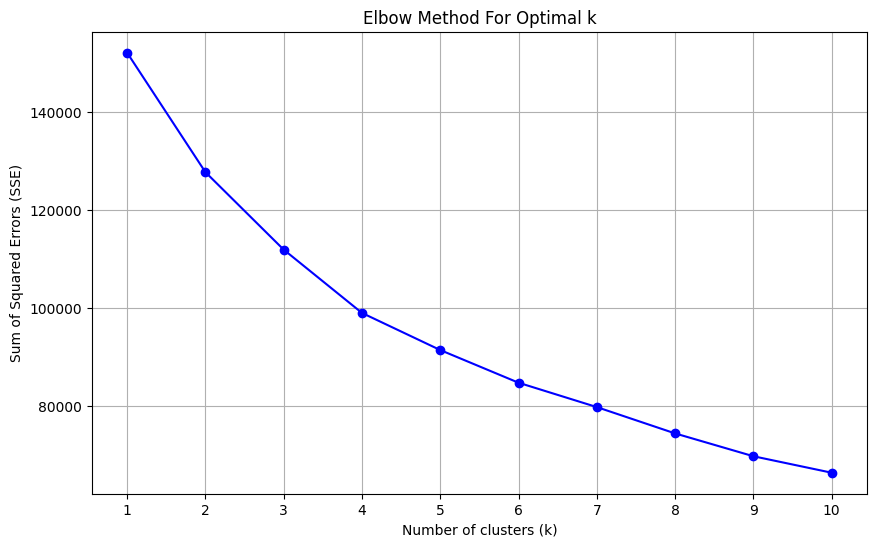

In [144]:
# 2. Create an elbow diagram and determine the best number of clusters (10 points)
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method For Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.show()


**Create an elbow diagram, determine the best number of clusters according to the elbow method, and provide your reasoning.**

Answer for Q2 Clustering:

We seek to find the "elbow point," where the SSE Sum of Squared Errors decreases/slow down radically. On the plot created, the fall from k=3 to k=4 is huge, whereas beyond k=4, the curve becomes flat. This reflects that after four clusters, the adding of more will not help much.

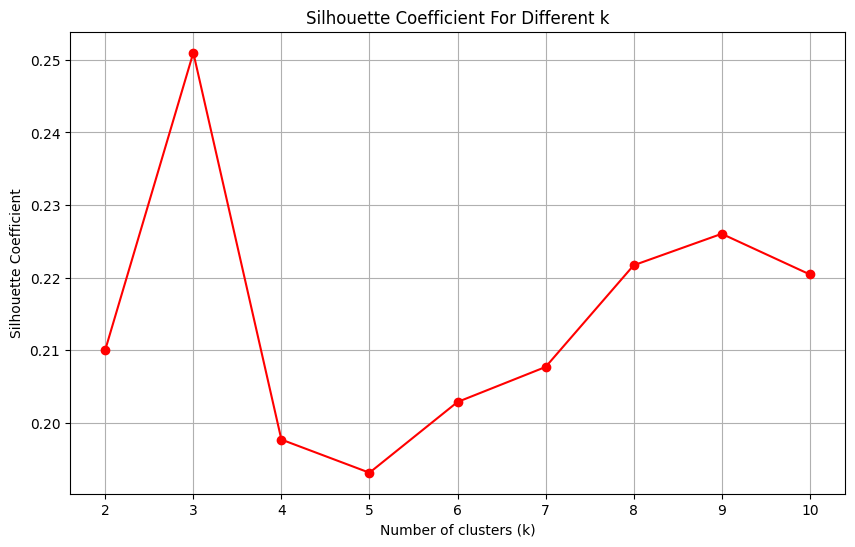

The best k by Silhouette Score is: 3 with a score of 0.2510


In [145]:
# 3. Calculate the silhouette coefficient (10 points)
k_range_silhouette = range(2, 11)
plt.figure(figsize=(10, 6))
plt.plot(k_range_silhouette, silhouette_coeffs, 'ro-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient For Different k')
plt.xticks(k_range_silhouette)
plt.grid(True)
plt.show()

best_k_silhouette = k_range_silhouette[np.argmax(silhouette_coeffs)]
print(f"The best k by Silhouette Score is: {best_k_silhouette} with a score of {max(silhouette_coeffs):.4f}")

**Based on the silhouette value, what is the best number of clusters? Is it the same as the elbow method? (10 points)**

Answer for Q3 Clustering 1:

No, it does not agree with the result obtained by the elbow method. This method is more accurate as this method considers both factors intra-cluster cohesion and inter-cluster separation. Though k=4 has a less SSE value, k=3 yields a better-defined cluster structure based on the silhouette score, a stronger measure.


# **Clustering 2**

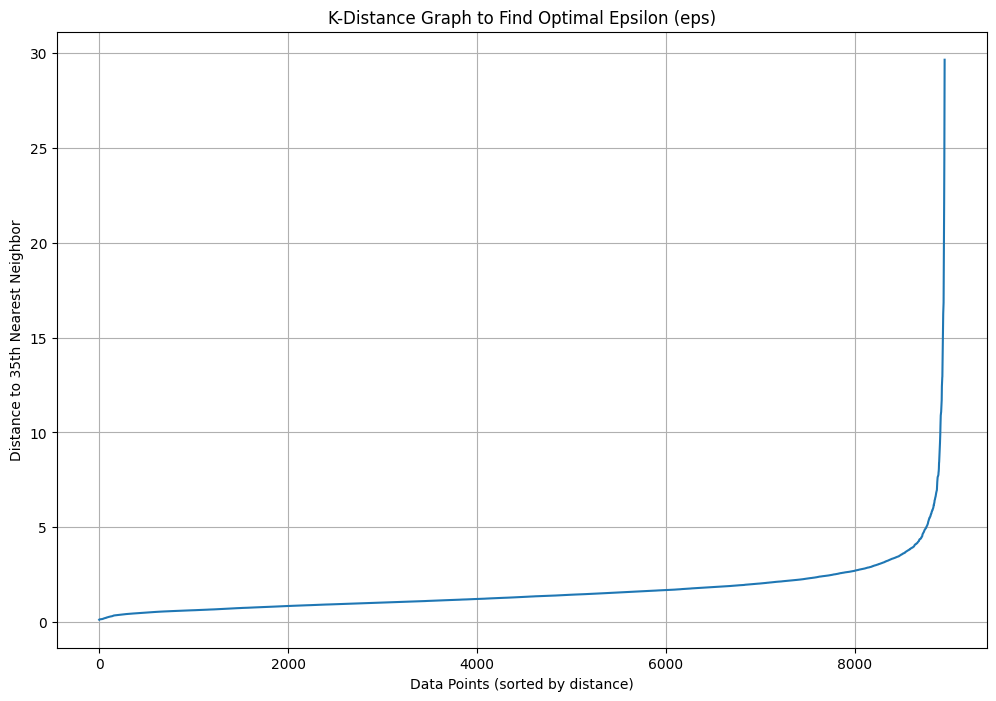

In [146]:
min_samples = 35
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)


distances = np.sort(distances[:, min_samples-1], axis=0)


plt.figure(figsize=(12, 8))
plt.plot(distances)
plt.title('K-Distance Graph to Find Optimal Epsilon (eps)')
plt.xlabel('Data Points (sorted by distance)')
plt.ylabel(f'Distance to {min_samples}th Nearest Neighbor')
plt.grid(True)
plt.show()

In [147]:
dbscan = DBSCAN(eps=1.6, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"DBSCAN produced {n_clusters_dbscan} cluster(s).")
print(f"It also identified {n_noise} noise points.")

DBSCAN produced 3 cluster(s).
It also identified 1125 noise points.


**How many clusters are produced?**

Answer for Q1 Clustering 2:

After tuning the parameters to eps=1.6 and min_samples=5, the DBSCAN algorithm successfully produced 3 clusters. It also identified 1125 data points as noise.

In [148]:
# 2. What are the silhouette coefficient and DBI values? (10 points)
core_samples_mask = dbscan_labels != -1

if n_clusters_dbscan > 1:
    silhouette_dbscan = silhouette_score(X_scaled[core_samples_mask], dbscan_labels[core_samples_mask])
    dbi_dbscan = davies_bouldin_score(X_scaled[core_samples_mask], dbscan_labels[core_samples_mask])
    print(f"Silhouette Coefficient for DBSCAN clusters: {silhouette_dbscan:.4f}")
    print(f"Davies-Bouldin Index (DBI) for DBSCAN clusters: {dbi_dbscan:.4f}")
else:
    print("Cannot calculate metrics as DBSCAN did not find more than one cluster.")

Silhouette Coefficient for DBSCAN clusters: 0.2849
Davies-Bouldin Index (DBI) for DBSCAN clusters: 0.6178


**What are the silhouette coefficient and DBI values of the clusters produced by DBSCAN?**

Answer for Q2 Clustering 2:

Outputs are: Silhouette Coefficient: 0.2849 and Davies-Bouldin Index (DBI): 0.6178. A Silhouette Score close to +1 allows the inference of well-separated clusters. This score of 0.2849 therefore shows that all three clusters are pretty distinct, but there may be some points lying quite near the boundary of a neighboring cluster. DBI can be interpreted as a measure of the similarity between clusters: A lower score means that the clusters are well separated. The score of 0.6178 is strong and corroborates the fact that the three clusters are reasonably compact and well separated among their selves.



# **Feature Selection**

In [149]:
best_k = 3
kmeans_base = KMeans(n_clusters=best_k, random_state=42, n_init=10)
y_pseudo = kmeans_base.fit_predict(X_scaled)

results = []
print("Starting Iterative Feature Selection")
for k_features in range(1, X_scaled.shape[1] + 1):
    selector = SelectKBest(score_func=f_classif, k=k_features)
    X_selected = selector.fit_transform(X_scaled, y_pseudo)

    kmeans_new = KMeans(n_clusters=best_k, random_state=42, n_init=10)
    new_labels = kmeans_new.fit_predict(X_selected)

    sil_score = silhouette_score(X_selected, new_labels)
    dbi_score = davies_bouldin_score(X_selected, new_labels)

    selected_features_names = X_scaled.columns[selector.get_support()].tolist()

    results.append({
        'k_features': k_features,
        'silhouette': sil_score,
        'dbi': dbi_score,
        'features': selected_features_names
    })


    print(f"\n--- Tested with {k_features} feature(s) ---")
    print(f"  Silhouette: {sil_score:.4f}, DBI: {dbi_score:.4f}")
    print(f"  Features: {selected_features_names}")


results_df = pd.DataFrame(results)
best_silhouette_result = results_df.loc[results_df['silhouette'].idxmax()]
best_dbi_result = results_df.loc[results_df['dbi'].idxmin()]


Starting Iterative Feature Selection

--- Tested with 1 feature(s) ---
  Silhouette: 0.7428, DBI: 0.4813
  Features: ['CASH_ADVANCE_FREQUENCY']

--- Tested with 2 feature(s) ---
  Silhouette: 0.5955, DBI: 0.6349
  Features: ['CASH_ADVANCE_FREQUENCY', 'PURCHASES_TRX']

--- Tested with 3 feature(s) ---
  Silhouette: 0.5780, DBI: 0.7835
  Features: ['CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY', 'PURCHASES_TRX']

--- Tested with 4 feature(s) ---
  Silhouette: 0.4966, DBI: 0.8787
  Features: ['CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'PURCHASES_TRX']

--- Tested with 5 feature(s) ---
  Silhouette: 0.4969, DBI: 0.8754
  Features: ['CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX']

--- Tested with 6 feature(s) ---
  Silhouette: 0.4867, DBI: 0.9437
  Features: ['PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX']

--- Tested with 7 feature(s)

1. Which features provide the best silhouette coefficient/DBI values? Include the feature selection process.
2. Why did you use that feature selection method?

Answer for Q1:

After running the iterative selection process, we can see that from the result that when using a very small number of feature will yield a better performance. The more feature used, the worse the scores get which indicates that they added more noise than valuable information for clustering

Based on the provided output:

Silhouette Score(s) Best: 0.7428 with 1 feature

Feature: ['CASH_ADVANCE_FREQUENCY']

This single feature provides a very high silhouette score, therefore being the most dominating in distinguishing the customers into clusters.

Best Davies-Bouldin Index (0.4813) using 1 feature:

Feature: ['CASH_ADVANCE_FREQUENCY']

This single feature optimizes the DBI also, which is a measure of cluster separation, and further asserts its importance.


Answer for Q2:

I used the Univariate Statistics method with SelectKBest

This method is fast and effective for determining the relationship between independent features and a dependent target. Although clustering is an unsupervised task, I adapted the method by creating a "pseudo-target" from the best initial KMeans result of k=3.


# **Bonus Challenge**

In [150]:
dimensions = X_scaled.shape[1]
annoy_index = AnnoyIndex(dimensions, 'euclidean')

for i in range(len(X_scaled)):
    annoy_index.add_item(i, X_scaled.iloc[i])

annoy_index.build(10)
print("ANNOY index built successfully with 10 trees.")


np.random.seed(42)
query_index = np.random.randint(0, len(X_scaled))
query_vector = X_scaled.iloc[query_index]
query_cluster = y_pseudo[query_index]

# Find the 5 nearest neighbors
n_neighbors = 5
neighbor_indices = annoy_index.get_nns_by_vector(query_vector, n_neighbors)
neighbor_indices = [idx for idx in neighbor_indices if idx != query_index][:n_neighbors]

neighbor_clusters = y_pseudo[neighbor_indices]

print("ANNOY Query Results")
print(f"Querying for 5 nearest neighbors of data point index: {query_index}")
print(f"This data point belongs to Cluster: {query_cluster}")
print(f"\nANNOY found the following neighbors:")
print(f"Neighbor Indices: {neighbor_indices}")
print(f"Their Clusters:   {neighbor_clusters.tolist()}")

/tmp/ipython-input-1022158823.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  annoy_index.add_item(i, X_scaled.iloc[i])


ANNOY index built successfully with 10 trees.
ANNOY Query Results
Querying for 5 nearest neighbors of data point index: 7270
This data point belongs to Cluster: 0

ANNOY found the following neighbors:
Neighbor Indices: [5377, 7692, 3304, 1159]
Their Clusters:   [0, 0, 1, 1]


/tmp/ipython-input-1022158823.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  neighbor_indices = annoy_index.get_nns_by_vector(query_vector, n_neighbors)


**Does ANNOY query the best cluster you have formed?**

No, it does not always ask for the best cluster perfectly, and the provided output is a great example of why.

It means that the query point, in turn, belongs to Cluster 0 (index 7270), but ANNOY produced five neighbors, and two of them (indices 3304 and 1159) belong to Cluster 1. This just illustrates the "approximate" nature of the ANNOY algorithm.

This result arises concerning how ANNOY works.

In this case, the neighbours from Cluster 1 are very close to the border of Cluster 0. Because ANNOY splits the data space in a way which is random, it found these points as the closest, but a perfect of course much slower search might have found other points belonging exclusively to Cluster 0.

This, therefore, is not a failure but a rather practical demonstration of the core in ANNOY's design that trades off a small amount of perfect accuracy for a substantial gain in search speed.